In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df["target"] = iris.target
df["species"] = df["target"].apply(lambda i: iris.target_names[i])

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [7]:
df.shape

(150, 6)

In [8]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
df.duplicated().sum()

np.int64(1)

In [11]:
df = df.drop_duplicates()

In [12]:
df.shape

(149, 6)

In [13]:
count_by_species = df.groupby("species").size()
count_by_species

species
setosa        50
versicolor    50
virginica     49
dtype: int64

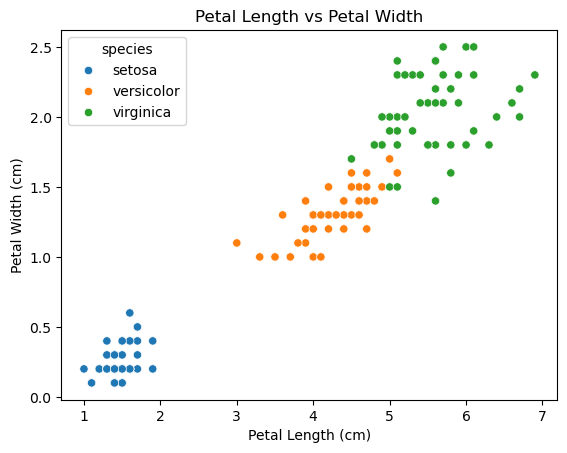

In [14]:
sns.scatterplot(
    df,
    x = "petal length (cm)",
    y = "petal width (cm)",
    hue = "species"
)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Petal Length vs Petal Width")
plt.show()

In [15]:
#By analyzing the scatter plot, we can clearly observe distinct patterns among the three iris species. Setosa flowers have the smallest petal length and petal width, forming a well-separated cluster. Virginica shows the largest petal dimensions, indicating generally bigger petals compared to the other species. Versicolor lies between Setosa and Virginica, with moderate petal length and width values, overlapping slightly with Virginica but still forming a noticeable group.

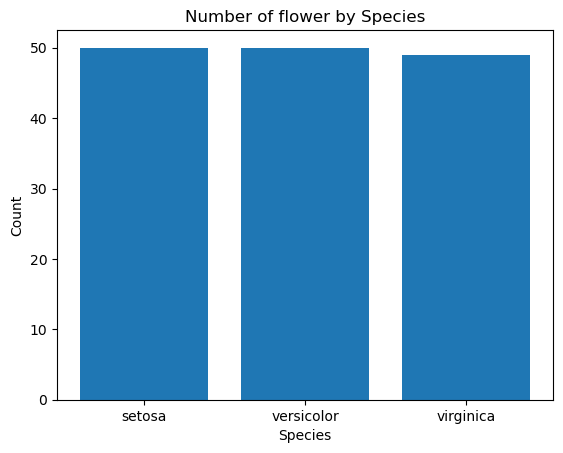

In [16]:
plt.bar(x = count_by_species.index, height = count_by_species.values)
plt.title("Number of flower by Species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

In [17]:
#By analyzing the bar graph, it is evident that all three iris species (Setosa, Versicolor, and Virginica) have approximately the same number of samples, indicating that the dataset is well-balanced across the three classes.

In [18]:
X = df.drop(["target", "species"], axis = 1)
y = df["target"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

In [20]:
#Using LogisticRegression
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression())
])
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("Precision score: ", precision_score(y_test, y_pred, average="macro"))
print("Confusion matrix:\n ", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy score:  1.0
Precision score:  1.0
Confusion matrix:
  [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [21]:
#Using KNeighborsClassifier
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("Precision score: ", precision_score(y_test, y_pred, average="macro"))
print("Confusion matrix:\n ", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy score:  1.0
Precision score:  1.0
Confusion matrix:
  [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [22]:
#Using DecisionTreeClassifier
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("dt", DecisionTreeClassifier())
])
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("Precision score: ", precision_score(y_test, y_pred, average="macro"))
print("Confusion matrix:\n ", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy score:  1.0
Precision score:  1.0
Confusion matrix:
  [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

